In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

# final things we need to see: loss, accuracy, agreement, calibration of the model (on OOD preferences too)

In [4]:
name_dir_map = {
    # gpt4 preferences on mistral vs chatgpt runs
    'gpt4prefs_dpo0.05': '/ebs/.cache/ubuntu/rm_dpob0.05_mistral7bsft0.1_2023-12-04_09-12-45_933448',
    'gpt4prefs_dpo0.1': '/ebs/.cache/ubuntu/rm_dpob0.1_mistral7bsft0.1_2023-12-04_18-03-56_130314',
    'gpt4prefs_tradrm': '/ebs/.cache/ubuntu/gpt4prefs_mistralsft_2023-12-04_07-30-28_579537',
    # HH preference runs
    'hhprefs_tradrm': '/ebs/.cache/ubuntu/rm_hh_mistralfm_2023-12-04_10-16-37_337525',
    'hhprefs_dpo0.05': '/ebs/.cache/ubuntu/hh_rm_dpob0.05_mistral7bfm20k_2023-12-04_10-24-38_731180',
    'hhprefs_dpo0.1': '/ebs/.cache/ubuntu/hh_rm_dpob0.1_mistral7bfm20k_2023-12-04_18-04-20_054612',
    # HH preference runs without feedme on mistral
    'hhprefs_nofm_dpo0.05': '/ebs/.cache/ubuntu/hh_rm_dpob0.05_mistral7b_2023-12-04_23-33-06_774585',
    'hhprefs_nofm_tradrm': '/ebs/.cache/ubuntu/tradrm_hh_mistral_2023-12-04_23-17-57_739945',
}

In [40]:
vals = {}
for key in name_dir_map:
    if os.path.exists(name_dir_map[key]):
        print(f'Found {key} at {name_dir_map[key]}')
        for epoch in range(1, 4):
            prediction_file = open(os.path.join(name_dir_map[key], f'epoch-{epoch}/test_predictions.txt')).read().splitlines()
            k = f'{key}_epoch{epoch}'
            vals[k] = {
                'accuracy': np.array([float(x.split(',')[0]) for x in prediction_file]),
                'loss': np.array([float(x.split(',')[1]) for x in prediction_file]),
            }
            # convert loss to probability
            vals[k]['probs'] = np.array([np.exp(-x) for x in vals[k]['loss']])
            print(f'accuracy: {np.mean(vals[k]["accuracy"])}, loss: {np.mean(vals[k]["loss"])}, probs: {np.mean(vals[k]["probs"])}')

Found gpt4prefs_dpo0.05 at /ebs/.cache/ubuntu/rm_dpob0.05_mistral7bsft0.1_2023-12-04_09-12-45_933448
accuracy: 0.7900390625, loss: 0.45083480642824725, probs: 0.7052133644327419
accuracy: 0.78125, loss: 0.5237158740422956, probs: 0.7484364011520124
accuracy: 0.7880859375, loss: 0.6207726011763528, probs: 0.7537582636833366
Found gpt4prefs_dpo0.1 at /ebs/.cache/ubuntu/rm_dpob0.1_mistral7bsft0.1_2023-12-04_18-03-56_130314
accuracy: 0.77734375, loss: 0.47361303022009094, probs: 0.7030171835315204
accuracy: 0.7958984375, loss: 0.6706165885868355, probs: 0.770847960309361
accuracy: 0.7998046875, loss: 0.7254645301812308, probs: 0.7821774825160885
Found gpt4prefs_tradrm at /ebs/.cache/ubuntu/gpt4prefs_mistralsft_2023-12-04_07-30-28_579537
accuracy: 0.7919921875, loss: 0.4192500305354372, probs: 0.7360333933568055
accuracy: 0.771484375, loss: 1.0049542278766812, probs: 0.776732720420025
accuracy: 0.78515625, loss: 1.1313630333694422, probs: 0.7819083296702453
Found hhprefs_nofm_dpo0.05 at /eb

0
skipping
1
2
3
4
5
6
7
8
9
10


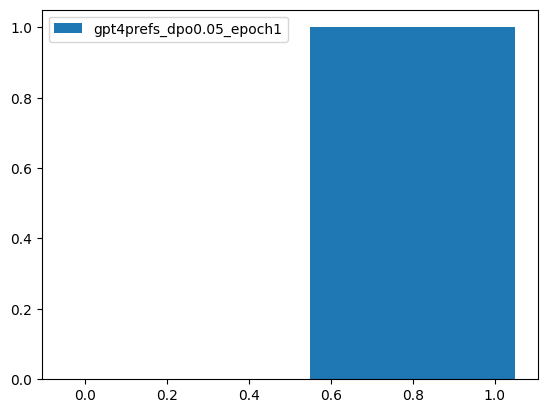

In [46]:
 # plot the ECE calibration plots
for key in vals:
    # bin the predictions
    bin_size = 0.1
    bins = np.arange(0, 1 + bin_size, bin_size)
    bin_indices = np.digitize(vals[key]['probs'], bins)

    # compute the accuracy and confidence for each bin
    bin_confs = []
    bin_accs = []
    for i in range(len(bins)):
        print(i)
        if not np.sum(bin_indices == i):
            print('skipping')
            bin_confs.append(0)
            bin_accs.append(0)
            continue
        idxs = np.where(bin_indices == i)[0]
        bin_confs.append(np.mean(vals[key]['probs'][idxs]))
        bin_accs.append(np.mean(vals[key]['accuracy'][idxs]))
    # plot
    plt.bar(bins, bin_accs, width=bin_size, label=key)
    break
# plt.xlabel('Confidence')
# plt.ylabel('Accuracy')
plt.legend()
plt.show()
